In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os

train_dir = r"C:\Sai\Hope AI\Sai's Files\Working Files\Week - 11 - Deep Learning\Capestone Project\data\train"
print("Path Exists:", os.path.exists(train_dir))
print("Contents:", os.listdir(train_dir) if os.path.exists(train_dir) else "Does not exist")

Path Exists: True
Contents: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [4]:
train_dir = r"C:\Sai\Hope AI\Sai's Files\Working Files\Week - 11 - Deep Learning\Capestone Project\data\train"
val_dir = r"C:\Sai\Hope AI\Sai's Files\Working Files\Week - 11 - Deep Learning\Capestone Project\data\val"
test_dir = r"C:\Sai\Hope AI\Sai's Files\Working Files\Week - 11 - Deep Learning\Capestone Project\data\test"

img_size = (292, 292)
batch_size = 32

In [5]:
# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize to [0,1]
    rotation_range=20,        # Random rotation
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    width_shift_range=0.2,    # Width shift
    height_shift_range=0.2,   # Height shift
    shear_range=0.15,         # Shear transform
    fill_mode='nearest'       # Filling in new pixels
)

In [6]:
# Only rescaling for validation and test
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    directory=val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


In [7]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
import PIL
print(PIL.__version__)

9.5.0


In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Shape of image batch: (32, 292, 292, 3)
Min pixel value: 0.0
Max pixel value: 1.0


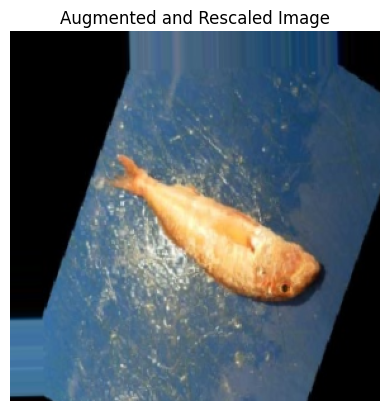

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(train_generator)

# Check shape and pixel range
print("Shape of image batch:", images.shape)
print("Min pixel value:", np.min(images))
print("Max pixel value:", np.max(images))

# Show one example image
plt.imshow(images[0])
plt.title("Augmented and Rescaled Image")
plt.axis('off')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(292, 292, 3)))  # First conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                     # Downsampling

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into Dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))  # softmax for multiclass


c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(
    train_generator,
    validation_data=val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    ),
    epochs=5
)

Found 1092 images belonging to 11 classes.


c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.3171 - loss: 1.9118 - val_accuracy: 0.5952 - val_loss: 1.3478
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.4879 - loss: 1.3931 - val_accuracy: 0.6886 - val_loss: 0.9627
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.5871 - loss: 1.1142 - val_accuracy: 0.7656 - val_loss: 0.8067
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.6389 - loss: 0.9745 - val_accuracy: 0.7793 - val_loss: 0.6889
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.6723 - loss: 0.8975 - val_accuracy: 0.7949 - val_loss: 0.5984


In [15]:
# Model Accuracy
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 610ms/step - accuracy: 0.8055 - loss: 0.5809
Test accuracy: 80.55%


In [16]:
# Classification Report (Precision, Recall, F1)
from sklearn.metrics import classification_report

# Predict on test data
y_probs = model.predict(test_generator)
y_pred = np.argmax(y_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print detailed report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report of CNN:\n", report)


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step
Classification Report of CNN:
                                   precision    recall  f1-score   support

                     animal fish       0.98      0.98      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.59      1.00      0.74       298
   fish sea_food gilt_head_bream       0.66      0.56      0.61       305
   fish sea_food hourse_mackerel       0.64      0.84      0.73       286
        fish sea_food red_mullet       0.99      0.93      0.96       291
     fish sea_food red_sea_bream       0.93      0.57      0.71       273
          fish sea_food sea_bass       0.67      0.39      0.50       327
            fish sea_food shrimp       0.91      1.00      0.96       289
fish sea_food striped_red_mullet       0.87      0.83      0.85       293
             fish sea_food trout       0.84      0.89      0.86       292

                        accuracy   

c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix of CNN:\n", cm)

Confusion Matrix of CNN:
 [[512   0   3   0   0   1   1   0   1   0   2]
 [ 10   0   0   0   2   0   0   0   0   0   1]
 [  0   0 297   0   1   0   0   0   0   0   0]
 [  0   0   7 172  42   0  10  48   0   0  26]
 [  0   0  46   0 239   0   0   0   0   0   1]
 [  0   0   0   0   0 272   0   0   0  19   0]
 [  0   0  15  68   9   0 155   8   0   0  18]
 [  0   0 117  19  44   0   0 128   3  16   0]
 [  0   0   0   0   0   0   0   0 289   0   0]
 [  0   0  17   0   2   1   0   6  23 244   0]
 [  0   0   0   1  32   0   0   0   0   0 259]]


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Sai\Hope AI\Sai's Files\Working Files\Week - 11 - Deep Learning\Capestone Project\data\test\fish sea_food red_mullet\0DTLG8H3NN5N.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(292, 292))  # Resize to match training size
img_array = image.img_to_array(img)                     # Convert to numpy array (H, W, C)
img_array = img_array / 255.0                           # Normalize to [0,1] like training
img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension -> (1, 128, 128, 3)

# Make prediction
pred = model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]

# Get the class labels from the training generator
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class_index]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Predicted class: fish sea_food red_mullet


In [19]:
# 5 Pre-Model Training
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [20]:
# VGG16 — Transfer Learning & Fine-tuning

Num_classes = 11
Epochs = 5
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load base model (exclude top)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(Num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Save only best model
checkpoint = ModelCheckpoint('vgg16_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Train
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1485 - loss: 2.4258

c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.1918 - loss: 2.3125 - val_accuracy: 0.2564 - val_loss: 2.0712
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2646 - loss: 2.0976

195/195 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.2977 - loss: 2.0431 - val_accuracy: 0.5174 - val_loss: 1.8735
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3650 - loss: 1.8965

195/195 ━━━━━━━━━━━━━━━━━━━━ 506s 3s/step - accuracy: 0.3888 - loss: 1.8568 - val_accuracy: 0.6154 - val_loss: 1.7253
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4500 - loss: 1.7543

195/195 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.4586 - loss: 1.7281 - val_accuracy: 0.6813 - val_loss: 1.6004
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4920 - loss: 1.6486

195/195 ━━━━━━━━━━━━━━━━━━━━ 510s 3s/step - accuracy: 0.5084 - loss: 1.6205 - val_accuracy: 0.7051 - val_loss: 1.4940


100/100 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step
Classification Report for VGG16:
                                   precision    recall  f1-score   support

                     animal fish       0.84      0.98      0.91       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.62      0.95      0.75       298
   fish sea_food gilt_head_bream       0.82      0.50      0.62       305
   fish sea_food hourse_mackerel       0.69      0.85      0.76       286
        fish sea_food red_mullet       0.51      0.48      0.49       291
     fish sea_food red_sea_bream       0.72      0.85      0.78       273
          fish sea_food sea_bass       0.79      0.61      0.69       327
            fish sea_food shrimp       0.78      0.87      0.82       289
fish sea_food striped_red_mullet       0.76      0.37      0.50       293
             fish sea_food trout       0.89      0.83      0.86       292

                        accuracy  

c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

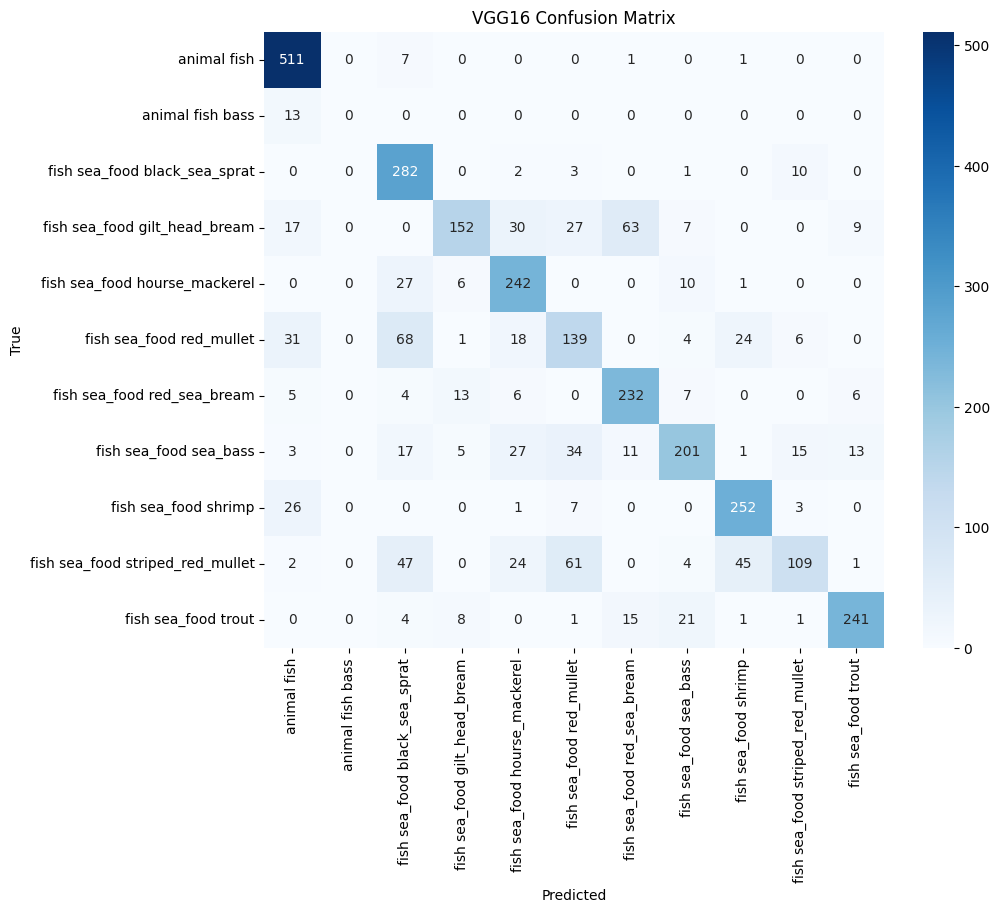

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load best model
model_vgg16 = tf.keras.models.load_model('vgg16_model.h5')

# Predict on test set
Y_pred = model_vgg16.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
report_vgg = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for VGG16:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_mat)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

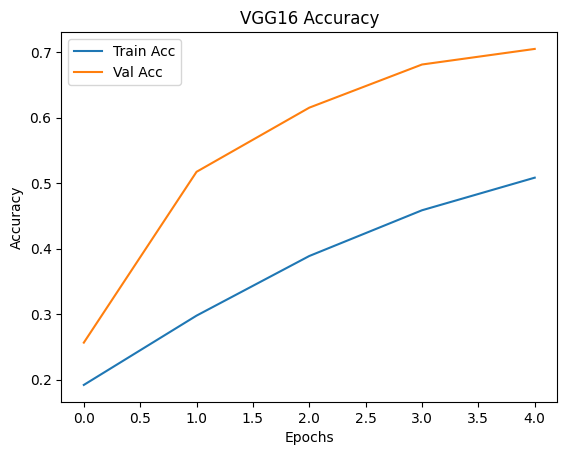

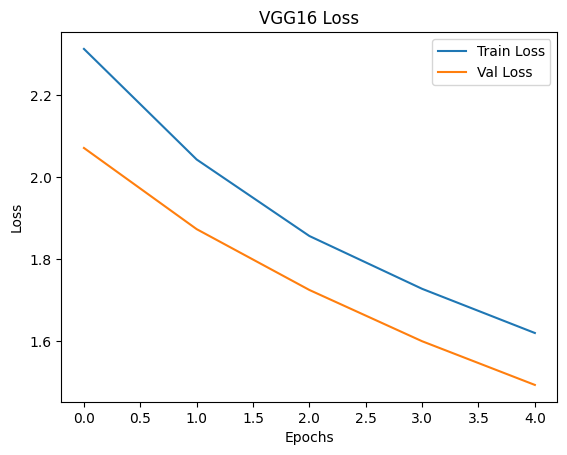

In [22]:
# plotting training history

# Accuracy
plt.plot(history_vgg16.history['accuracy'], label='Train Acc')
plt.plot(history_vgg16.history['val_accuracy'], label='Val Acc')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [24]:
# Load base model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_resnet.trainable = False  # Freeze pre-trained layers

# Add custom top layers
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(Num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=x)

model_resnet.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [25]:
checkpoint_resnet = ModelCheckpoint("resnet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_resnet = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint_resnet, early_stop_resnet]
    )

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1510 - loss: 2.3693

195/195 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.1677 - loss: 2.3162 - val_accuracy: 0.1859 - val_loss: 2.3163
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.1878 - loss: 2.2449 - val_accuracy: 0.1667 - val_loss: 2.2578
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2020 - loss: 2.2016

195/195 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.2039 - loss: 2.1901 - val_accuracy: 0.1905 - val_loss: 2.1812
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2117 - loss: 2.1617

195/195 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.2103 - loss: 2.1613 - val_accuracy: 0.2573 - val_loss: 2.1444
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.2231 - loss: 2.1247 - val_accuracy: 0.2170 - val_loss: 2.1199
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.2288 - loss: 2.1005 - val_accuracy: 0.2134 - val_loss: 2.1369
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.2395 - loss: 2.0789 - val_accuracy: 0.2335 - val_loss: 2.0719


100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step
Classification Report for ResNet50:
                                  precision    recall  f1-score   support

                     animal fish       0.34      0.76      0.47       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.16      0.42      0.23       298
   fish sea_food gilt_head_bream       0.23      0.07      0.11       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.26      0.45      0.33       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.21      0.46      0.29       293
             fish sea_food trout       0.19      0.01      0.02       292

                        accuracy

c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

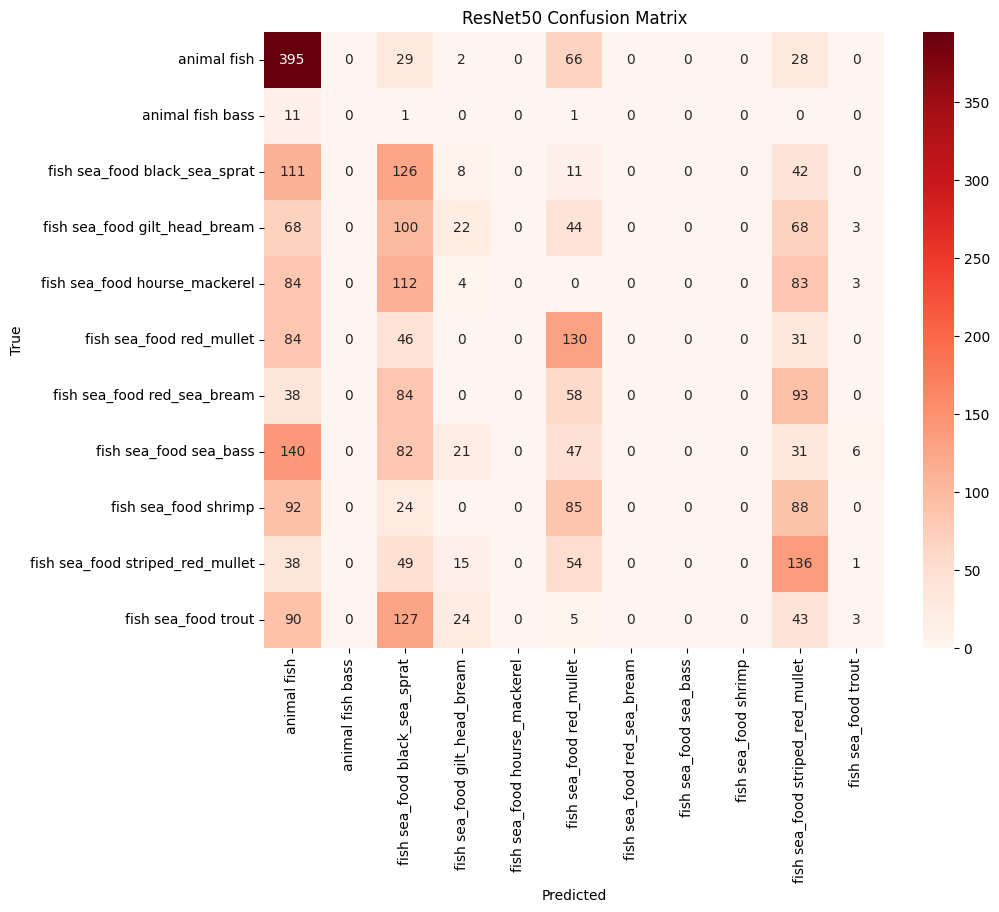

In [26]:
# Predict on test set
Y_pred = model_resnet.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Classification Report
report_resnet = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for ResNet50:")
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Reds')
plt.title('ResNet50 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

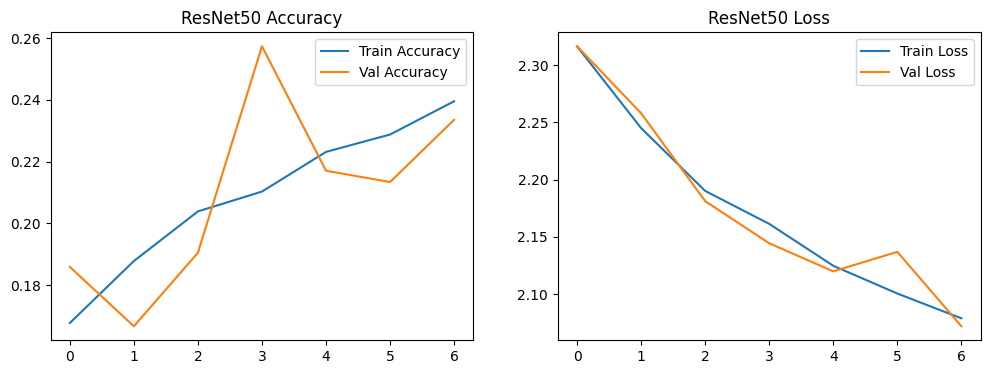

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Loss')
plt.legend()
plt.show()

In [28]:
# MobileNet

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
# Load pre-trained MobileNet model without top
base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_mobile.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_mobile.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_mobile = Model(inputs=base_model_mobile.input, outputs=output)

# Compile the model
model_mobile.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

C:\Users\Sai Vennela Jagadesh\AppData\Local\Temp\ipykernel_13268\499666302.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobile = MobileNet(weights='imagenet', include_top=False, input_shape=(*img_size, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [30]:
checkpoint_mobile = ModelCheckpoint("mobilenet_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_mobile = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_mobile = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_mobile, early_stop_mobile]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.7419 - loss: 0.9158

195/195 ━━━━━━━━━━━━━━━━━━━━ 128s 648ms/step - accuracy: 0.8890 - loss: 0.4371 - val_accuracy: 0.9918 - val_loss: 0.0602
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 649ms/step - accuracy: 0.9798 - loss: 0.0818 - val_accuracy: 0.9908 - val_loss: 0.0434
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.9881 - loss: 0.0468

195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 664ms/step - accuracy: 0.9876 - loss: 0.0478 - val_accuracy: 0.9945 - val_loss: 0.0280
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 645ms/step - accuracy: 0.9912 - loss: 0.0337 - val_accuracy: 0.9945 - val_loss: 0.0174
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 126s 646ms/step - accuracy: 0.9936 - loss: 0.0258 - val_accuracy: 0.9945 - val_loss: 0.0221


100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 367ms/step
Classification Report for MobileNet:
                                  precision    recall  f1-score   support

                     animal fish       0.99      1.00      1.00       520
                animal fish bass       1.00      0.62      0.76        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       0.99      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.98      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accur

c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sai Vennela Jagadesh\anaconda3\envs\SAI\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

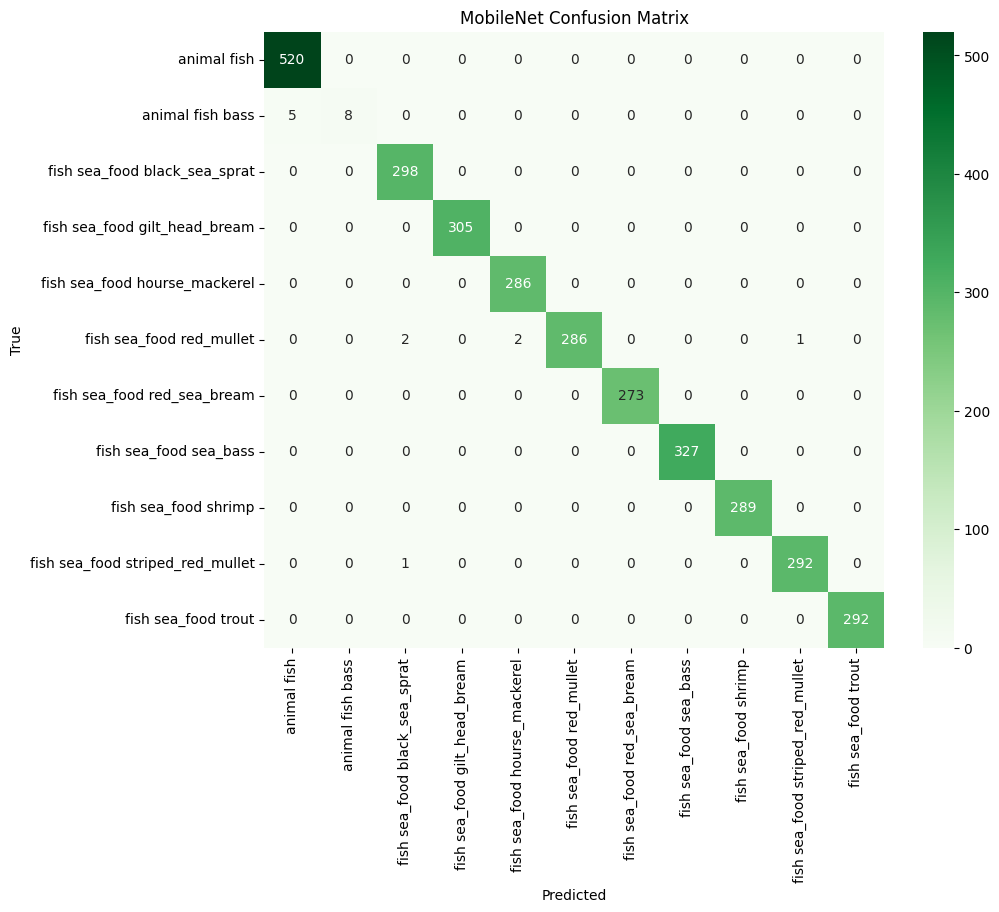

In [31]:
# Predict test set
Y_pred_mobile = model_mobile.predict(test_generator)
y_pred_mobile = np.argmax(Y_pred_mobile, axis=1)

# Classification report
report_mobilenet = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print("Classification Report for MobileNet:")
print(classification_report(test_generator.classes, y_pred_mobile, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_mobile = confusion_matrix(test_generator.classes, y_pred_mobile)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mobile, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Greens')
plt.title('MobileNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

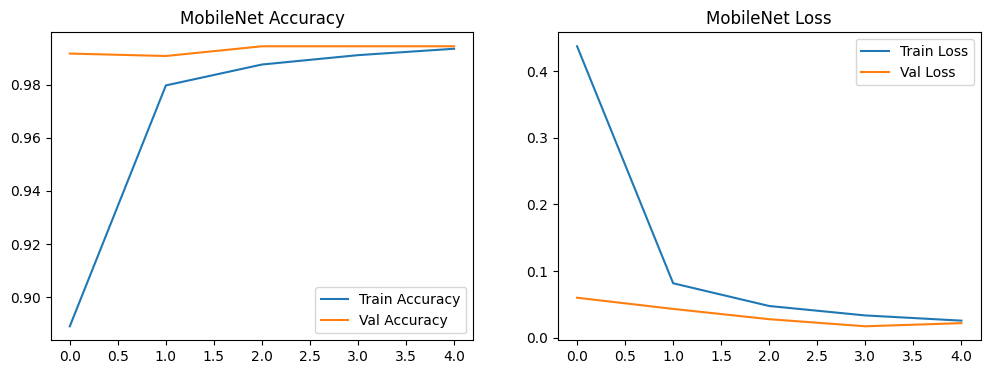

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mobile.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobile.history['val_accuracy'], label='Val Accuracy')
plt.title('MobileNet Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobile.history['loss'], label='Train Loss')
plt.plot(history_mobile.history['val_loss'], label='Val Loss')
plt.title('MobileNet Loss')
plt.legend()
plt.show()

In [33]:
# InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
# Load pre-trained InceptionV3 without top
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(*img_size, 3))
base_model_inception.trainable = False  # Freeze base layers

# Add custom top layers
x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(Num_classes, activation='softmax')(x)

model_inception = Model(inputs=base_model_inception.input, outputs=output)

# Compile the model
model_inception.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [35]:
checkpoint_inception = ModelCheckpoint("inception_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
early_stop_inception = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_inception = model_inception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=Epochs,
    callbacks=[checkpoint_inception, early_stop_inception]
)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 745ms/step - accuracy: 0.6846 - loss: 0.9789

195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 867ms/step - accuracy: 0.8381 - loss: 0.5318 - val_accuracy: 0.9478 - val_loss: 0.1886
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 757ms/step - accuracy: 0.9505 - loss: 0.1825

195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 870ms/step - accuracy: 0.9510 - loss: 0.1731 - val_accuracy: 0.9606 - val_loss: 0.1234
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.9602 - loss: 0.1253

195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 878ms/step - accuracy: 0.9603 - loss: 0.1229 - val_accuracy: 0.9689 - val_loss: 0.0994
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 767ms/step - accuracy: 0.9684 - loss: 0.1034

195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 878ms/step - accuracy: 0.9690 - loss: 0.0955 - val_accuracy: 0.9753 - val_loss: 0.0773
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 759ms/step - accuracy: 0.9626 - loss: 0.1146

195/195 ━━━━━━━━━━━━━━━━━━━━ 170s 871ms/step - accuracy: 0.9655 - loss: 0.1030 - val_accuracy: 0.9808 - val_loss: 0.0655


100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 648ms/step
Classification Report for InceptionV3:
                                  precision    recall  f1-score   support

                     animal fish       0.98      1.00      0.99       520
                animal fish bass       1.00      0.31      0.47        13
   fish sea_food black_sea_sprat       0.99      1.00      0.99       298
   fish sea_food gilt_head_bream       0.99      1.00      0.99       305
   fish sea_food hourse_mackerel       0.99      1.00      0.99       286
        fish sea_food red_mullet       0.97      0.99      0.98       291
     fish sea_food red_sea_bream       1.00      0.99      1.00       273
          fish sea_food sea_bass       0.99      0.99      0.99       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      0.94      0.97       293
             fish sea_food trout       1.00      1.00      1.00       292

                        acc

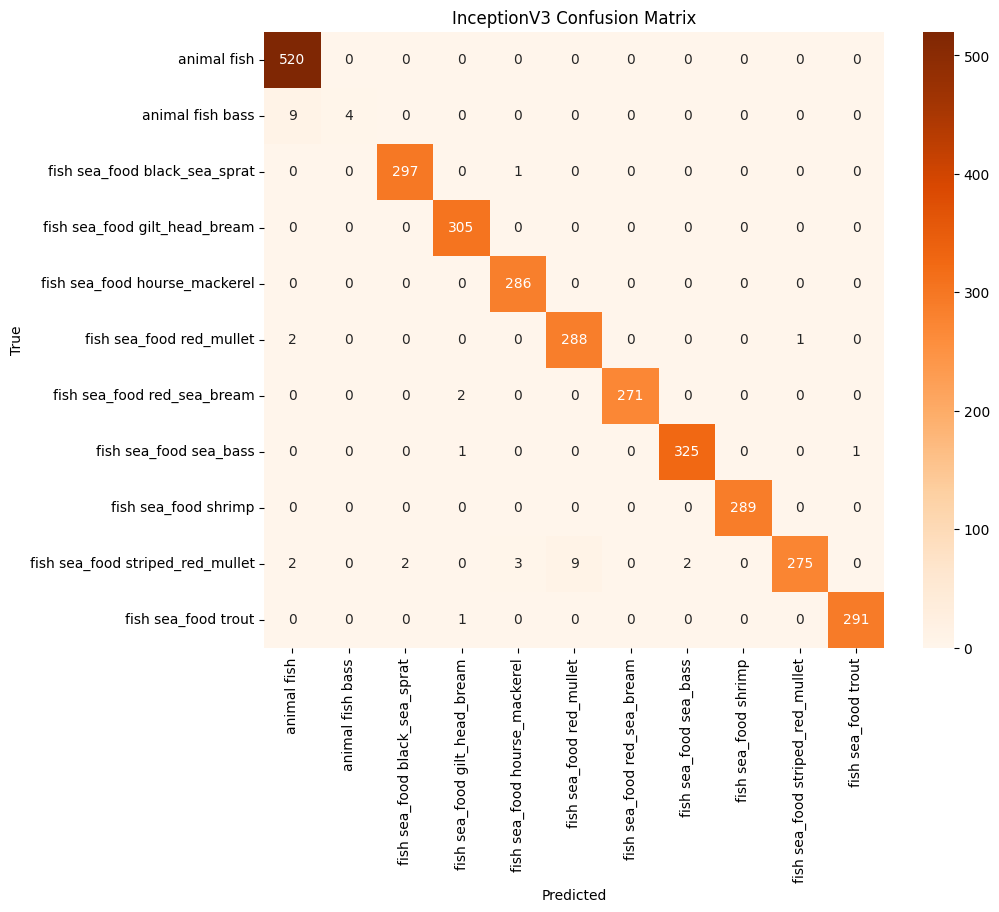

In [36]:
# Predict test set
Y_pred_inception = model_inception.predict(test_generator)
y_pred_inception = np.argmax(Y_pred_inception, axis=1)

# Classification report
report_inception = classification_report(y_true, y_pred_inception, target_names=class_labels, output_dict=True)
print("Classification Report for InceptionV3:")
print(classification_report(test_generator.classes, y_pred_inception, target_names=test_generator.class_indices.keys()))

# Confusion matrix
cm_inception = confusion_matrix(test_generator.classes, y_pred_inception)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_inception, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(),
            cmap='Oranges')
plt.title('InceptionV3 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

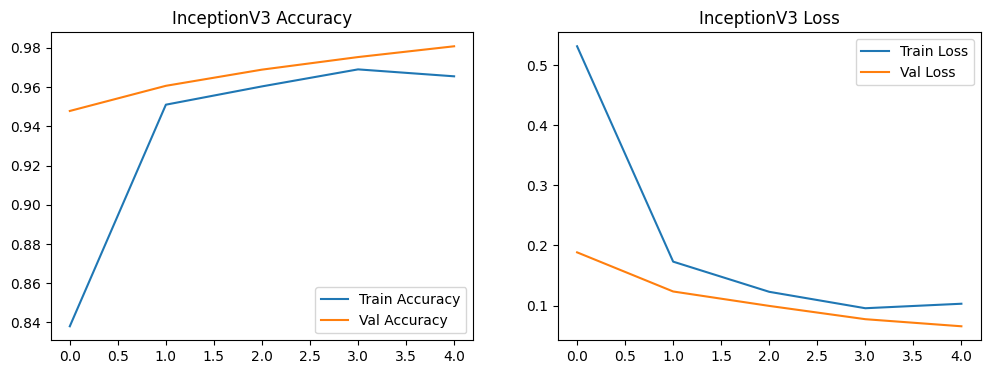

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Train Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Val Accuracy')
plt.title('InceptionV3 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Train Loss')
plt.plot(history_inception.history['val_loss'], label='Val Loss')
plt.title('InceptionV3 Loss')
plt.legend()
plt.show()

In [42]:
import pandas as pd

# Combine key metrics (weighted avg) from each report
summary = {
    'Model': ['VGG16', 'ResNet50', 'MobileNet', 'InceptionV3'],
    'Accuracy': [
        report_vgg['accuracy'],
        report_resnet['accuracy'],
        report_mobilenet['accuracy'],
        report_inception['accuracy'],
    ],
    'Precision': [
        report_vgg['weighted avg']['precision'],
        report_resnet['weighted avg']['precision'],
        report_mobilenet['weighted avg']['precision'],
        report_inception['weighted avg']['precision'],
    ],
    'Recall': [
        report_vgg['weighted avg']['recall'],
        report_resnet['weighted avg']['recall'],
        report_mobilenet['weighted avg']['recall'],
        report_inception['weighted avg']['recall'],
    ],
    'F1-Score': [
        report_vgg['weighted avg']['f1-score'],
        report_resnet['weighted avg']['f1-score'],
        report_mobilenet['weighted avg']['f1-score'],
        report_inception['weighted avg']['f1-score'],
    ]
}

df_summary = pd.DataFrame(summary)
print(df_summary)

         Model  Accuracy  Precision    Recall  F1-Score
0        VGG16  0.740822   0.746576  0.740822  0.727075
1     ResNet50  0.254785   0.153348  0.254785  0.167974
2    MobileNet  0.254785   0.153348  0.254785  0.167974
3  InceptionV3  0.988704   0.988877  0.988704  0.987920


In [44]:
import json

with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)